In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# import plot libraries
import seaborn as sns
import matplotlib.pyplot as plt

# import ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import cross_validation,metrics
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestRegressor

# Reading data
train = pd.read_csv(r'D:\Asha\Imp\ML\Data\Census_train.csv')
test = pd.read_csv(r'D:\Asha\Imp\ML\Data\Census_test.csv')


C:\Users\Ganesh\Anaconda4\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Ganesh\Anaconda4\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# check shape
train.shape , test.shape

# check column types
ctype = train.dtypes.reset_index()
ctype.columns = ['Count', 'Column Type']
ctype.groupby('Column Type').aggregate('count').reset_index()
#train.info()

,Column Type,Count
0,int64,13
1,object,28


In [3]:
# display data header
train.head(5)

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [4]:
# numerical data distribution
train.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672,-43794.199165
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001,24126.148404
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,-50000.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,-50000.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000,-50000.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000,-50000.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,50000.000000


In [5]:
# categorical data distribution
train.describe(include = ['O'])

,class_of_worker,education,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,...,migration_reg,migration_within_reg,live_1_year_ago,migration_sunbelt,family_members_under_18,country_father,country_mother,country_self,citizenship,fill_questionnaire_veteran_admin
count,199523,199523,199523,199523,199523,199523,199523,198649,199523,199523,...,99827,99827,199523,99827,199523,192810,193404,196130,199523,199523
unique,9,17,3,7,24,15,5,9,2,3,...,8,9,3,3,5,42,42,42,5,3
top,Not in universe,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Nonmover,Nonmover,Not in universe under 1 year old,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
freq,100245,48407,186943,86485,100684,100684,167365,171907,103984,180459,...,82538,82538,101212,84054,144232,159163,160479,176989,176992,197539


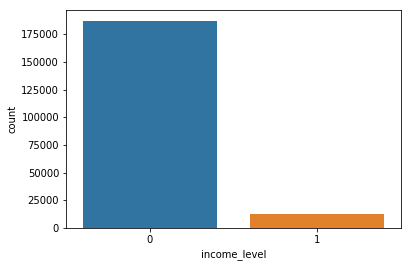

In [6]:
# Encoding Target/Dependent variable as the values are not same in train & test data sets.
train['income_level'] = train['income_level'].map({50000:1,-50000:0})
test['income_level'] = test['income_level'].replace(['-50000', ' 50000+.'],[0,1])

# Checking the distribution of outcome variable.
sns.countplot('income_level',data=train)
# This dataset is imbalanced. Getting the percentage of >50000 & <50000 categories
cnt_less = len(train[train['income_level'] == 0])
cnt_more = len(train[train['income_level'] == 1])
percent_less = cnt_less/(cnt_less+cnt_more)*100
percent_more = cnt_more/(cnt_less+cnt_more)*100
# % of people having <50000 income is 93.79% and % of people having >50000 income is 6.21%

In [7]:
# check missing values
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
# Setting the missing values with value - 'Unavailable'
train = train.fillna('Unavailable')

In [8]:
# Separating Numerical & Categorical columns for analysis. This will help in analysis.
train_num = train.loc[:,train.dtypes == 'int64']
train_cat = train.loc[:,train.dtypes == 'object']

# check correlation between variables in numerical dataframe
train_num.corr()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
age,1.000000,0.157822,0.117414,0.036938,0.053590,0.063351,0.104976,0.140887,-0.002265,0.674844,0.206181,0.004413,0.135720
industry_code,0.157822,1.000000,0.563493,0.165980,0.066017,0.072586,0.012774,0.642096,0.252694,0.476475,0.754472,0.003430,0.196190
occupation_code,0.117414,0.563493,1.000000,0.194498,0.002534,0.043680,-0.026726,0.515554,0.228952,0.438680,0.655613,-0.003140,0.013414
wage_per_hour,0.036938,0.165980,0.194498,1.000000,-0.001082,0.010993,-0.005731,0.191543,0.054051,0.113094,0.195687,0.002283,0.024528
capital_gains,0.053590,0.066017,0.002534,-0.001082,1.000000,-0.012700,0.131476,0.058015,0.015048,0.051530,0.083549,0.005243,0.240725
capital_losses,0.063351,0.072586,0.043680,0.010993,-0.012700,1.000000,0.042427,0.084255,0.024116,0.075391,0.100762,0.000096,0.147417
dividend_from_Stocks,0.104976,0.012774,-0.026726,-0.005731,0.131476,0.042427,1.000000,0.007206,-0.004885,0.054585,0.013823,0.001913,0.175779
num_person_Worked_employer,0.140887,0.642096,0.515554,0.191543,0.058015,0.084255,0.007206,1.000000,0.240553,0.463334,0.747302,0.018774,0.222684
business_or_self_employed,-0.002265,0.252694,0.228952,0.054051,0.015048,0.024116,-0.004885,0.240553,1.000000,0.177448,0.265872,0.007377,0.040473
veterans_benefits,0.674844,0.476475,0.438680,0.113094,0.051530,0.075391,0.054585,0.463334,0.177448,1.000000,0.532279,0.003122,0.140930


In [9]:
# Dropping highly correlated (correlation coefficient >0.7)
train_num = train_num.drop(['weeks_worked_in_year'],1)

C:\Users\Ganesh\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ganesh\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ganesh\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ganesh\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ganesh\Anaconda4\lib\site-packages\matplotlib\axes\_axe

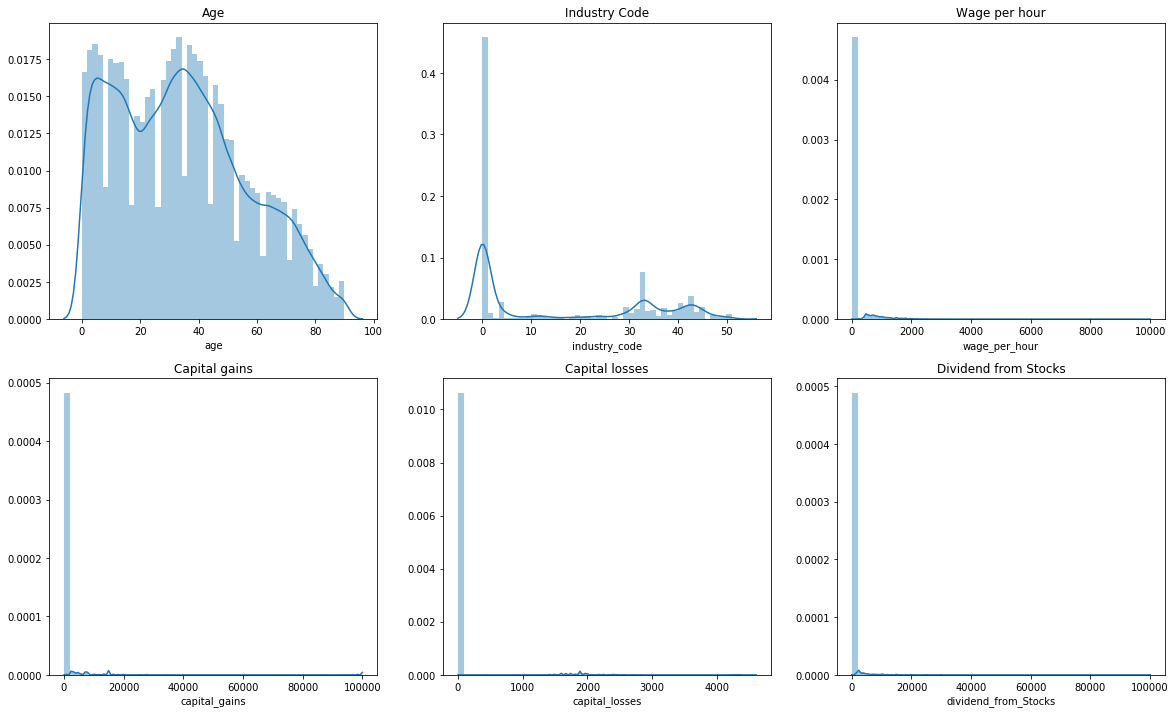

In [10]:
# Variable Analysis
# Univariate Analysis of Numeric variables
plt.figure(figsize=(20,12))
plt.subplot(231)
plt.title('Age')
sns.distplot(train_num.age)
plt.subplot(232)
plt.title('Industry Code')
sns.distplot(train_num.industry_code)
plt.subplot(233)
plt.title('Wage per hour')
sns.distplot(train_num.wage_per_hour)
plt.subplot(234)
plt.title('Capital gains')
sns.distplot(train_num.capital_gains)
plt.subplot(235)
plt.title('Capital losses')
sns.distplot(train_num.capital_losses)
plt.subplot(236)
plt.title('Dividend from Stocks')
sns.distplot(train_num.dividend_from_Stocks)

In [11]:
# Bi variate analysis of numeric variables having high correlation with outcome variable
#train_num_bi = train.loc[:,['age','industry_code','capital_gains','capital_losses','dividend_from_Stocks']]
#sns.pairplot(train_num_bi)

In [12]:
le=LabelEncoder()
for col in train_cat.columns:
    train_cat[col] = le.fit_transform(train_cat[col])
# # Factorizing for getting correlation coefficient for categorical variables
#df_cat_train = train_cat.apply(lambda x:pd.factorize(x)[0])
train_cat.head(5)
#df_cat_train.corr()

,class_of_worker,education,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,...,migration_reg,migration_within_reg,live_1_year_ago,migration_sunbelt,family_members_under_18,country_father,country_mother,country_self,citizenship,fill_questionnaire_veteran_admin
0,3,12,2,6,14,6,4,0,0,1,...,8,9,1,2,4,40,40,40,4,1
1,6,16,2,0,4,8,4,0,1,1,...,7,8,0,3,4,40,40,40,4,1
2,3,0,1,4,14,6,1,0,0,1,...,8,9,1,2,4,41,41,41,0,1
3,3,10,2,4,14,6,4,0,0,1,...,5,6,2,1,0,40,40,40,4,1
4,3,10,2,4,14,6,4,0,0,1,...,5,6,2,1,0,40,40,40,4,1


In [13]:
# dropping columns that are highly correlated (> 0.7)
#df_cat_train = df_cat_train.drop([ 'major_occupation_code', 'country_mother', 'region_of_previous_residence',
                                 # 'migration_msa' ,'migration_reg','migration_within_reg','migration_sunbelt'],1)


In [14]:
# Feature Engineering
train_num['age_bin'] = train_num['age'].map(lambda x: 1 if (0<x<=18) else (2 if (18<x<=60) else 3))
train_num['wage_per_hour_bin'] = train_num['wage_per_hour'].map(lambda x: 0 if x==0 else 1)
train_num['capital_losses_bin'] = train_num['capital_losses'].map(lambda x: 0 if x==0 else 1)
train_num['capital_gains_bin'] = train_num['capital_gains'].map(lambda x: 0 if x==0 else 1)
train_num['dividend_from_Stocks_bin'] = train_num['dividend_from_Stocks'].map(lambda x: 0 if x==0 else 1)
# Dropping redundunt columns
train_num.drop(['age','wage_per_hour','capital_losses','capital_gains','dividend_from_Stocks'],1,inplace=True)

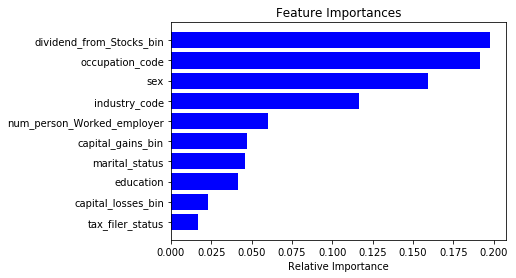

In [15]:
train=pd.concat([train_num,train_cat],1)
# Checking for important features
df_train = train.drop('income_level',1)
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df_train,train.income_level)

features = df_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = features,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [16]:
features[indices]

Index(['tax_filer_status', 'capital_losses_bin', 'education', 'marital_status',
       'capital_gains_bin', 'num_person_Worked_employer', 'industry_code',
       'sex', 'occupation_code', 'dividend_from_Stocks_bin'],
      dtype='object')

In [17]:
# Taking top 10 features for the model
imp =['tax_filer_status', 'capital_losses_bin', 'education', 'marital_status',
       'capital_gains_bin', 'num_person_Worked_employer', 'industry_code',
       'sex', 'occupation_code', 'dividend_from_Stocks_bin','income_level']
train = train[imp]


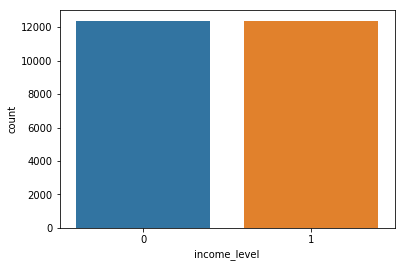

In [18]:
# Sampling Techniques

# 1. Undersampling 

# finding no. of samples which are >50K
more_50k = len(train[train['income_level'] == 1])

# getting indices of <50k records
less_50k_indices = train[train.income_level == 0].index

# getting random sample from <50k indices
random_indices = np.random.choice(less_50k_indices,more_50k, replace=False)

# finding indices of >50k samples
more_50k_indices = train[train.income_level == 1].index

# Concatinating more than 50k & random less than 50k samples
under_sample_indices = np.concatenate([more_50k_indices,random_indices])

# Getting the dataframe for the above . Here the income levle is evenly disrtibuted.
under_sample = train.loc[under_sample_indices]

sns.countplot('income_level',data=under_sample)

In [19]:
# Running Logistic Regression on undersampled(balanced) data ( Undersample Majority class)

X_under = under_sample.loc[:,under_sample.columns != 'income_level']
y_under = under_sample.loc[:,under_sample.columns == 'income_level']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.3, random_state = 0)

alg = LogisticRegression()
alg.fit(X_under_train,y_under_train)
y_under_pred = alg.predict(X_under_test)

print('Recall Score :',recall_score(y_under_test,y_under_pred))
print('Acuracy Score :',accuracy_score(y_under_test,y_under_pred))
print('Precision Score :',precision_score(y_under_test,y_under_pred))
print('f1 :',f1_score(y_under_test,y_under_pred))
print('Confusion Matrix :',confusion_matrix(y_under_test,y_under_pred))

result = [['LR - undersampling',recall_score(y_under_test,y_under_pred),
          accuracy_score(y_under_test,y_under_pred),f1_score(y_under_test,y_under_pred),
           confusion_matrix(y_under_test,y_under_pred)]]
result_df=pd.DataFrame(result)
result_df.columns = ['Model','Recall','Accuracy','Precision','Confusion Matrix']

Recall Score : 0.8231674692348849
Acuracy Score : 0.8213997308209959
Precision Score : 0.8220678600053433
f1 : 0.822617297152787
Confusion Matrix : [[3026  666]
 [ 661 3077]]


C:\Users\Ganesh\Anaconda4\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# Logistic Regression using weights on the unbalanced data set
X = train.loc[:,train.columns != 'income_level']
y = train.loc[:,train.columns == 'income_level']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

alg = LogisticRegression(class_weight = 'balanced')
alg.fit(X_train,y_train)
y_pred = alg.predict(X_test)

print('Recall Score :',recall_score(y_test,y_pred))
print('Acuracy Score :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print('f1 :',f1_score(y_test,y_pred))
print('Confusion Matrix :',confusion_matrix(y_test,y_pred))

result_df = result_df.append({'Model':'LR-weights on unbalanced dataset',
                  'Recall':recall_score(y_test,y_pred),
                  'Accuracy':accuracy_score(y_test,y_pred),
                  'Precision':f1_score(y_test,y_pred),
                   'Confusion Matrix':confusion_matrix(y_test,y_pred)},ignore_index=True )

C:\Users\Ganesh\Anaconda4\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall Score : 0.8259668508287292
Acuracy Score : 0.8195365621397664
Precision Score : 0.22716912323355112
f1 : 0.3563341675604814
Confusion Matrix : [[46065 10172]
 [  630  2990]]


In [21]:
# Oversampling with SMOTE
X = train.loc[:,train.columns != 'income_level']
y = train.loc[:,train.columns == 'income_level']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0,stratify=y)

sm = SMOTE(random_state=2,ratio=1.0)
X_train_smote, y_train_smote = sm.fit_sample(X_train,y_train)

alg = LogisticRegression()
alg.fit(X_train_smote, y_train_smote)
y_pred = alg.predict(X_test)

print('Recall Score :',recall_score(y_test,y_pred))
print('Acuracy Score :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print('f1 :',f1_score(y_test,y_pred))
print('Confusion Matrix :',confusion_matrix(y_test,y_pred))

result_df =result_df.append({'Model':'LR - Oversampling(SMOTE)',
                  'Recall':recall_score(y_test,y_pred),
                  'Accuracy':accuracy_score(y_test,y_pred),
                  'Precision':f1_score(y_test,y_pred),
                   'Confusion Matrix':confusion_matrix(y_test,y_pred)},ignore_index=True )

C:\Users\Ganesh\Anaconda4\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ganesh\Anaconda4\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Ganesh\Anaconda4\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall Score : 0.8191117092866756
Acuracy Score : 0.8302287117630353
Precision Score : 0.24279901061198436
f1 : 0.37456917774495324
Confusion Matrix : [[46652  9490]
 [  672  3043]]


In [22]:
# Near Miss


X = train.loc[:,train.columns != 'income_level']
y = train.loc[:,train.columns == 'income_level']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0,stratify=y)

sm = NearMiss()
X_train_res, y_train_res = sm.fit_sample(X_train,y_train)

alg = LogisticRegression()
alg.fit(X_train_res,y_train_res)
y_pred = alg.predict(X_test)

print('Recall Score :',recall_score(y_test,y_pred))
print('Acuracy Score :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print('f1 :',f1_score(y_test,y_pred))
print('Confusion Matrix :',confusion_matrix(y_test,y_pred))

result_df =result_df.append({'Model':'Near Miss',
                  'Recall':recall_score(y_test,y_pred),
                  'Accuracy':accuracy_score(y_test,y_pred),
                  'Precision':f1_score(y_test,y_pred),
                   'Confusion Matrix':confusion_matrix(y_test,y_pred)},ignore_index=True )

C:\Users\Ganesh\Anaconda4\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ganesh\Anaconda4\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall Score : 0.7851951547779273
Acuracy Score : 0.739880047446414
Precision Score : 0.16490474306065916
f1 : 0.27256587553728273
Confusion Matrix : [[41370 14772]
 [  798  2917]]


In [23]:
result_df

,Model,Recall,Accuracy,Precision,Confusion Matrix
0,LR - undersampling,0.823167,0.821400,0.822617,"[[3026, 666], [661, 3077]]"
1,LR-weights on unbalanced dataset,0.825967,0.819537,0.356334,"[[46065, 10172], [630, 2990]]"
2,LR - Oversampling(SMOTE),0.819112,0.830229,0.374569,"[[46652, 9490], [672, 3043]]"
3,Near Miss,0.785195,0.739880,0.272566,"[[41370, 14772], [798, 2917]]"


In [ ]:
# Logistic Regression with undersampling technique works well for this data set considering the confusion matrix and other metrics